<div class="alert alert-block alert-danger">

# InvJNB: Why Are Soccer Stars Born in January?

**Standalone Investigation Notebook**  
**Use with CourseKata intro chapters or as standalone**  
**Kernel: R**

</div>


<div class="alert alert-block alert-warning">

#### Summary of Notebook

Have you noticed that many professional soccer players seem to be born in January, February, or March? This investigation explores the "relative age effect"—a phenomenon where players born early in the year have advantages in youth sports due to age cutoffs. Students will examine birth month distributions of professional soccer players, compare observed patterns to expected uniform distributions, and explore how the effect varies across countries and positions.

#### Includes

- Distribution analysis of birth months
- Expected vs. observed frequency comparisons
- Visualization of categorical distributions
- Cross-group comparisons (countries, positions)
- Optional: Quantifying the effect and historical trends

</div>


<div class="alert alert-block alert-success">

## Approximate time to complete Notebook: 60-90 mins (depends on optional sections)

**Core sections (1.0-5.0): 60-75 mins**  
**With all optional advanced sections: 85-90 mins**

</div>


<div class="alert alert-block alert-success">

### Intro — Approximate Time: 3-5 mins

</div>


### The Relative Age Effect in Soccer

If you look at professional soccer players, you might notice something surprising: many of them were born in January, February, or March. This isn't a coincidence—it's called the **relative age effect**.

**The Problem:**
- Youth sports teams group players by birth year (e.g., all players born in 2005 play together)
- A player born in January 2005 is nearly a full year older than a player born in December 2005
- Older players in the same age group tend to be bigger, stronger, and more coordinated
- They get more playing time, better coaching, and more opportunities
- This advantage compounds over years, leading to overrepresentation of early-born players in professional leagues

**Research Question:**
Are professional soccer players born disproportionately in the first few months of the year?

**Study References:**
- Musch, J., & Grondin, S. (2001). Unequal competition as an impediment to personal development: A review of the relative age effect in sport. *Developmental Review*, 21(2), 147-167.
- Helsen, W. F., et al. (2005). The relative age effect in youth soccer across Europe. *Journal of Sports Sciences*, 23(6), 629-636.


At the beginning of each notebook, load the packages you will use. Always run this first.


In [1]:
# Install coursekata if not already installed
if (!require("coursekata", quietly = TRUE)) {
    install.packages("coursekata", repos = "https://cloud.r-project.org")
}

suppressPackageStartupMessages({
    library(coursekata)
    library(dplyr)
    library(lubridate)
    library(tidyr)
})


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2

Loading required package: dslabs

Loading required package: Metrics

Loading required package: lsr

Loading required package: mosaic


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following objects are masked from ‘package:dplyr’:

    count, do, tally


The following object is masked from ‘package:Matrix’:

    mean


The following object is masked from ‘package:ggplot2’:

    stat


The following objects are masked from ‘package:stats’:

    IQR, binom.test, cor, cor.test, cov, fivenum, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, sample, sum


Loading required package: supernova

── CourseKata pa

<div class="alert alert-block alert-success">

### 1.0 — Approximate Time: 10-12 mins

</div>


## 1.0 — Data Exploration

Let's start by loading and exploring the FIFA player data.

1.1 — Load the data and check its dimensions. How many players are in the dataset? What variables do we have?


In [2]:
# Load data from the same folder as this notebook
df <- read.csv("fifa_players.csv")

# Check dimensions
dim(df)

# Look at variable names
names(df)

# Look at first few rows
head(df[, c("name", "birth_date", "nationality", "positions")], 10)


[1] 17954    51

[1] "name"                          "full_name"                    
 [3] "birth_date"                    "age"                          
 [5] "height_cm"                     "weight_kgs"                   
 [7] "positions"                     "nationality"                  
 [9] "overall_rating"                "potential"                    
[11] "value_euro"                    "wage_euro"                    
[13] "preferred_foot"                "international_reputation.1.5."
[15] "weak_foot.1.5."                "skill_moves.1.5."             
[17] "body_type"                     "release_clause_euro"          
[19] "national_team"                 "national_rating"              
[21] "national_team_position"        "national_jersey_number"       
[23] "crossing"                      "finishing"                    
[25] "heading_accuracy"              "short_passing"                
[27] "volleys"                       "dribbling"                    
[29] "curve"                         "freekick_accuracy"            
[31] "long_passing"                  "ball_control"                 
[33] "acceleration"                  "sprint_speed"                 
[35] "agility"                       "reactions"                    
[37] "balance"                       "shot_power"                   
[39] "jumping"                       "stamina"                      
[41] "strength"                      "long_shots"                   
[43] "aggression"                    "interceptions"                
[45] "positioning"                   "vision"                       
[47] "penalties"                     "composure"                    
[49] "marking"                       "standing_tackle"              
[51] "sliding_tackle"

,name,birth_date,nationality,positions
,<chr>,<chr>,<chr>,<chr>
1,L. Messi,6/24/1987,Argentina,"CF,RW,ST"
2,C. Eriksen,2/14/1992,Denmark,"CAM,RM,CM"
3,P. Pogba,3/15/1993,France,"CM,CAM"
4,L. Insigne,6/4/1991,Italy,"LW,ST"
5,K. Koulibaly,6/20/1991,Senegal,CB
6,V. van Dijk,7/8/1991,Netherlands,CB
7,K. Mbappé,12/20/1998,France,"RW,ST,RM"
8,S. Agüero,6/2/1988,Argentina,ST
9,M. Neuer,3/27/1986,Germany,GK


<div class="alert alert-block alert-warning">

**Sample Responses**
- There are [X] players in the dataset
- Key variables include: name, birth_date, nationality, positions, and many skill ratings
- The birth_date is in format like "6/24/1987" (month/day/year)

</div>


1.2 — We need to extract the birth month from the birth_date. Create a new variable called `birth_month` that contains just the month (1-12, where 1 = January, 12 = December).


In [3]:
# Convert birth_date to date format and extract month
df <- df %>%
  mutate(
    birth_date_parsed = as.Date(birth_date, format = "%m/%d/%Y"),
    birth_month = month(birth_date_parsed)
  )

# Check a few examples
head(df[, c("name", "birth_date", "birth_month")], 10)

# Verify we have all 12 months
table(df$birth_month)


,name,birth_date,birth_month
,<chr>,<chr>,<dbl>
1,L. Messi,6/24/1987,6
2,C. Eriksen,2/14/1992,2
3,P. Pogba,3/15/1993,3
4,L. Insigne,6/4/1991,6
5,K. Koulibaly,6/20/1991,6
6,V. van Dijk,7/8/1991,7
7,K. Mbappé,12/20/1998,12
8,S. Agüero,6/2/1988,6
9,M. Neuer,3/27/1986,3



   1    2    3    4    5    6    7    8    9   10   11   12 
2002 2091 1815 1533 1526 1384 1396 1333 1403 1242 1151 1078 

<div class="alert alert-block alert-warning">

**Sample Responses**
- Successfully extracted birth_month as numbers 1-12
- All 12 months are represented in the data
- January = 1, February = 2, ..., December = 12

</div>


<div class="alert alert-block alert-success">

### 2.0 — Approximate Time: 12-15 mins

</div>


## 2.0 — Birth Month Distribution

Now let's examine the distribution of birth months among professional soccer players.

2.1 — Count how many players were born in each month using `tally()`. Which months have the most players? Which have the fewest?


In [4]:
# Count players by birth month
tally(~ birth_month, data = df)

# Create a summary table with month names
month_names <- c("January", "February", "March", "April", "May", "June",
                 "July", "August", "September", "October", "November", "December")

birth_month_counts <- df %>%
  group_by(birth_month) %>%
  summarize(count = n()) %>%
  mutate(month_name = month_names[birth_month]) %>%
  arrange(birth_month)

birth_month_counts


birth_month
   1    2    3    4    5    6    7    8    9   10   11   12 
2002 2091 1815 1533 1526 1384 1396 1333 1403 1242 1151 1078 

birth_month,count,month_name
<dbl>,<int>,<chr>
1,2002,January
2,2091,February
3,1815,March
4,1533,April
5,1526,May
6,1384,June
7,1396,July
8,1333,August
9,1403,September


<div class="alert alert-block alert-warning">

**Sample Responses**
- January, February, and March typically have the highest counts
- November and December typically have the lowest counts
- There's a clear pattern: more players born in early months, fewer in late months

</div>


2.2 — Visualize the birth month distribution using `gf_bar()`. What pattern do you see?


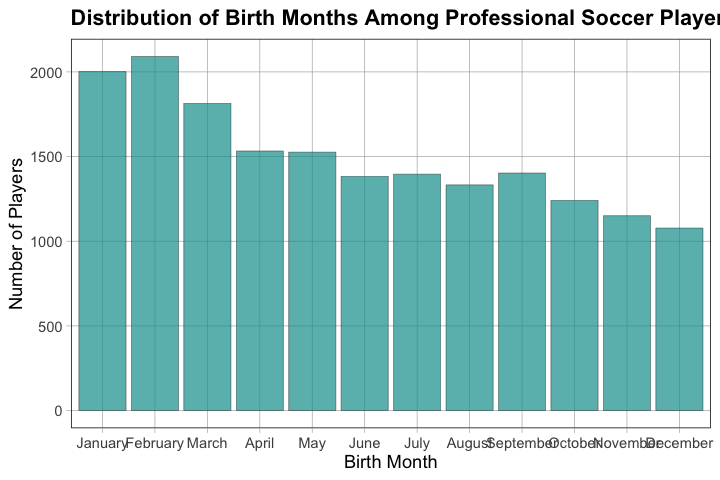

In [5]:
# Create month name variable for better labels
df <- df %>%
  mutate(month_name = factor(month_names[birth_month], levels = month_names))

# Bar chart showing counts
gf_bar(~ month_name, data = df) %>%
  gf_labs(x = "Birth Month", y = "Number of Players",
          title = "Distribution of Birth Months Among Professional Soccer Players")

2.3 — Now create a bar chart using `gf_props()` to show proportions instead of counts. Does this change how you interpret the pattern?


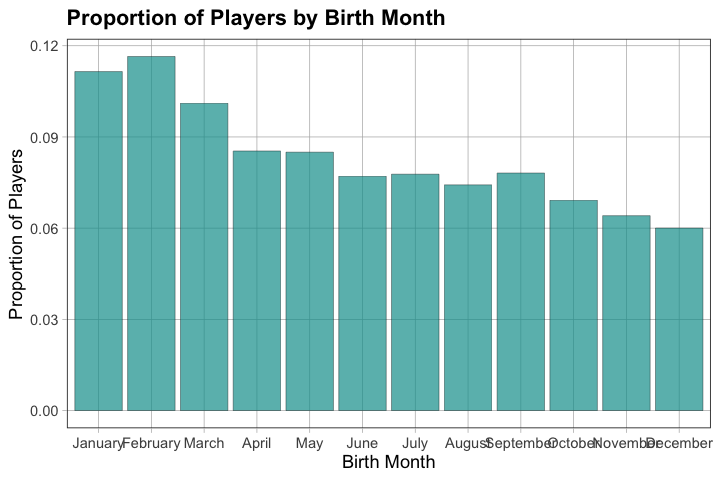

In [6]:
# Bar chart showing proportions
gf_props(~ month_name, data = df) %>%
  gf_labs(x = "Birth Month", y = "Proportion of Players",
          title = "Proportion of Players by Birth Month")

<div class="alert alert-block alert-warning">

**Sample Responses**
- The pattern is the same in both visualizations—early months have higher bars
- Proportions make it easier to see the relative differences (e.g., if January has 10% and December has 6%, that's a 4 percentage point difference)
- The visual pattern clearly shows a decline from early months to late months

</div>


<div class="alert alert-block alert-success">

### 3.0 — Approximate Time: 15-18 mins

</div>


## 3.0 — Expected vs. Observed

If birth months were completely random (uniformly distributed), what would we expect to see?

3.1 — If birth months were uniformly distributed, how many players would we expect in each month? (Hint: total players divided by 12)


In [7]:
# Calculate expected count per month (uniform distribution)
total_players <- nrow(df)
expected_per_month <- total_players / 12

cat("Total players:", total_players, "\n")
cat("Expected players per month (if uniform):", round(expected_per_month, 2), "\n")

# Add expected values to our summary
birth_month_summary <- df %>%
  group_by(birth_month, month_name) %>%
  summarize(observed = n(), .groups = 'drop') %>%
  mutate(expected = expected_per_month,
         difference = observed - expected)

birth_month_summary


Total players: 17954 
Expected players per month (if uniform): 1496.17 


birth_month,month_name,observed,expected,difference
<dbl>,<fct>,<int>,<dbl>,<dbl>
1,January,2002,1496.167,505.83333
2,February,2091,1496.167,594.83333
3,March,1815,1496.167,318.83333
4,April,1533,1496.167,36.83333
5,May,1526,1496.167,29.83333
6,June,1384,1496.167,-112.16667
7,July,1396,1496.167,-100.16667
8,August,1333,1496.167,-163.16667
9,September,1403,1496.167,-93.16667


<div class="alert alert-block alert-warning">

**Sample Responses**
- Expected count per month: [total/12]
- If birth months were random, each month should have approximately the same number of players
- The difference column shows how far each month deviates from expected

</div>


3.2 — Create a visualization that compares observed and expected counts. Which months are overrepresented (observed > expected)? Which are underrepresented (observed < expected)?


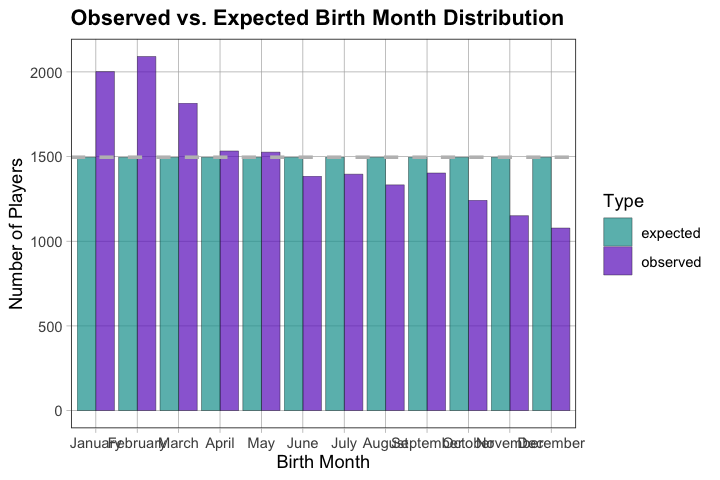

In [8]:
# Prepare data for comparison plot
comparison_data <- birth_month_summary %>%
  select(month_name, observed, expected) %>%
  pivot_longer(cols = c(observed, expected), 
               names_to = "type", 
               values_to = "count")

# Create comparison plot
gf_col(count ~ month_name, fill = ~ type, data = comparison_data, position = "dodge") %>%
  gf_labs(x = "Birth Month", y = "Number of Players", fill = "Type",
          title = "Observed vs. Expected Birth Month Distribution") %>%
  gf_hline(yintercept = ~ expected_per_month, linetype = "dashed", color = "gray")


3.3 — Look at the differences (observed - expected). What's the largest positive difference? The largest negative difference? What does this tell us?


In [9]:
# Show differences sorted
birth_month_summary %>%
  arrange(desc(difference)) %>%
  select(month_name, observed, expected, difference)


month_name,observed,expected,difference
<fct>,<int>,<dbl>,<dbl>
February,2091,1496.167,594.83333
January,2002,1496.167,505.83333
March,1815,1496.167,318.83333
April,1533,1496.167,36.83333
May,1526,1496.167,29.83333
September,1403,1496.167,-93.16667
July,1396,1496.167,-100.16667
June,1384,1496.167,-112.16667
August,1333,1496.167,-163.16667


<div class="alert alert-block alert-warning">

**Sample Responses**
- Largest positive difference: Typically January or February (most overrepresented)
- Largest negative difference: Typically November or December (most underrepresented)
- This tells us that early months have many more players than expected by chance, while late months have fewer
- The pattern is consistent with the relative age effect hypothesis

</div>


<div class="alert alert-block alert-success">

### 4.0 — Approximate Time: 10-12 mins

</div>


## 4.0 — The Relative Age Effect Explained

Now that we've seen the pattern, let's understand why it happens.

4.1 — In youth soccer, players are typically grouped by birth year. If the cutoff is January 1st, who would be in the same age group: a player born January 15, 2005 and a player born December 20, 2005, or a player born January 15, 2005 and a player born January 15, 2006?

4.2 — Why does being older within the same age group give an advantage? Think about physical and cognitive development.


<div class="alert alert-block alert-warning">

**Sample Responses**
- January 15, 2005 and December 20, 2005 would be in the same age group (both born in 2005)
- The January 2005 player is nearly 11 months older than the December 2005 player
- Advantages of being older: 
  - Physical: Bigger, stronger, faster, more coordinated
  - Cognitive: Better decision-making, game understanding
  - Social: More confidence, leadership opportunities
- These advantages lead to: more playing time, better coaching attention, selection for elite teams
- The advantage compounds over years, making it harder for late-born players to catch up

</div>


4.3 — Why is the effect especially strong in Italy? (Hint: Think about how Italy structures their youth leagues differently from other countries.)


<div class="alert alert-block alert-warning">

**Sample Responses**
- Italy uses calendar year cutoffs (January 1st), which means the age gap within a group can be up to 12 months
- Some other countries use different cutoffs (e.g., August 1st for school year), which can reduce the effect
- Italy's system creates the maximum possible advantage for early-born players
- This is why the pattern is especially pronounced in Italian players

</div>


<div class="alert alert-block alert-success">

### 5.0 — Approximate Time: 12-15 mins

</div>


## 5.0 — Comparing Across Groups

Does the relative age effect vary by country or position? Let's find out.

5.1 — Compare the birth month distribution for Italian players versus players from other countries. Is the effect stronger in Italy?


In [10]:
# Create Italy vs. Other comparison
df <- df %>%
  mutate(country_group = ifelse(nationality == "Italy", "Italy", "Other Countries"))

# Count by country group and month
italy_comparison <- df %>%
  group_by(country_group, month_name, birth_month) %>%
  summarize(count = n(), .groups = 'drop') %>%
  group_by(country_group) %>%
  mutate(proportion = count / sum(count)) %>%
  ungroup()

# Show summary
italy_comparison %>%
  group_by(country_group) %>%
  summarize(
    jan_mar = sum(proportion[birth_month %in% 1:3]),
    oct_dec = sum(proportion[birth_month %in% 10:12]),
    .groups = 'drop'
  )


country_group,jan_mar,oct_dec
<chr>,<dbl>,<dbl>
Italy,0.3465649,0.1618321
Other Countries,0.3284005,0.1945199


In [11]:
# Create Italy vs. Other comparison
df <- df %>%
  mutate(country_group = ifelse(nationality == "Italy", "Italy", "Other Countries"))

# Count by country group and month (include birth_month to use later)
italy_comparison <- df %>%
  group_by(country_group, month_name, birth_month) %>%
  summarize(count = n(), .groups = 'drop') %>%
  group_by(country_group) %>%
  mutate(proportion = count / sum(count)) %>%
  ungroup()

# Show summary
italy_comparison %>%
  group_by(country_group) %>%
  summarize(
    jan_mar = sum(proportion[birth_month %in% 1:3]),
    oct_dec = sum(proportion[birth_month %in% 10:12]),
    .groups = 'drop'
  )


country_group,jan_mar,oct_dec
<chr>,<dbl>,<dbl>
Italy,0.3465649,0.1618321
Other Countries,0.3284005,0.1945199


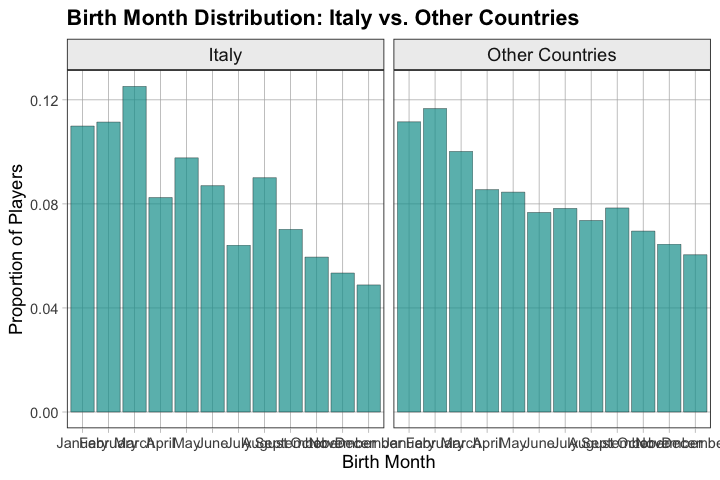

In [12]:
# Visualize with faceted plot
gf_props(~ month_name, data = df) %>%
  gf_facet_grid(. ~ country_group) %>%
  gf_labs(x = "Birth Month", y = "Proportion of Players",
          title = "Birth Month Distribution: Italy vs. Other Countries")


5.2 — Does the effect vary by position? Compare goalkeepers, defenders, midfielders, and forwards. (Hint: You may need to extract the primary position from the positions variable.)


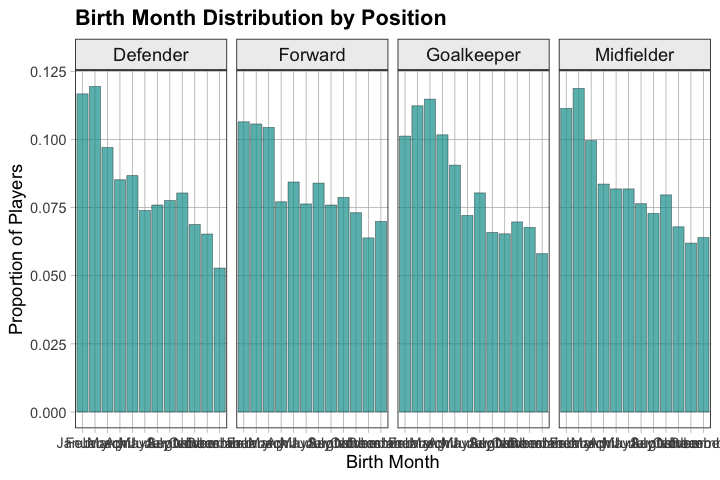

In [13]:
# Extract primary position (first position listed)
df <- df %>%
  mutate(
    primary_position = case_when(
      grepl("GK", positions) ~ "Goalkeeper",
      grepl("CB|LB|RB|LWB|RWB", positions) ~ "Defender",
      grepl("CM|CAM|CDM|LM|RM", positions) ~ "Midfielder",
      grepl("ST|CF|LW|RW", positions) ~ "Forward",
      TRUE ~ "Other"
    )
  )

# Filter to main positions and visualize
df_main_positions <- df %>%
  filter(primary_position != "Other")

gf_props(~ month_name, data = df_main_positions) %>%
  gf_facet_grid(. ~ primary_position) %>%
  gf_labs(x = "Birth Month", y = "Proportion of Players",
          title = "Birth Month Distribution by Position")


5.3 — What do you notice about the patterns across countries and positions? Are there any interesting differences?

<div class="alert alert-block alert-warning">

**Sample Responses**
- Italy typically shows a stronger effect (more pronounced early-month overrepresentation)
- The effect appears across all positions, though may vary slightly
- Goalkeepers might show a slightly different pattern (physical size matters more)
- The pattern is consistent but not identical across groups, suggesting the relative age effect is robust but may interact with other factors

</div>


<div class="alert alert-block alert-success">

### Wrap-Up — Approximate Time: 3-5 mins

</div>


### Summary and Implications

- What did we learn about birth month distributions in professional soccer?
- Why does the relative age effect occur, and what are its consequences?
- What are the implications for fairness in youth sports?
- What potential solutions could address this issue?


<div class="alert alert-block alert-warning">

**Sample Responses**
- Professional soccer players are disproportionately born in early months (Jan-Mar) and underrepresented in late months (Oct-Dec)
- The relative age effect occurs because age cutoffs in youth sports create advantages for older players within the same age group
- Consequences: Late-born players get fewer opportunities, less development, and are less likely to reach professional levels
- Implications: The system is unfair to late-born players, potentially missing talented athletes
- Potential solutions: 
  - Use different age cutoffs (e.g., mid-year instead of calendar year)
  - Create narrower age bands
  - Weight teams by birth month to ensure balanced competition
  - Increase awareness among coaches and parents

</div>


<div class="alert alert-block alert-info">

---

## Optional Advanced Sections

The sections below explore additional aspects of the relative age effect.

*Total additional time: ~20-30 mins*

</div>


<div class="alert alert-block alert-success">

### A1.0 — Optional Advanced: Quantifying the Effect — Approximate Time: 8-10 mins

</div>


## A1.0 — Quantifying the Effect

A1.1 — Calculate what percentage of players were born in Q1 (January-March) versus Q4 (October-December). How much larger is Q1?

A1.2 — Calculate the ratio: (Q1 players) / (Q4 players). What does this ratio tell us?


In [14]:
# Calculate Q1 vs Q4
quarter_summary <- df %>%
  mutate(
    quarter = case_when(
      birth_month %in% 1:3 ~ "Q1 (Jan-Mar)",
      birth_month %in% 4:6 ~ "Q2 (Apr-Jun)",
      birth_month %in% 7:9 ~ "Q3 (Jul-Sep)",
      birth_month %in% 10:12 ~ "Q4 (Oct-Dec)"
    )
  ) %>%
  group_by(quarter) %>%
  summarize(
    count = n(),
    proportion = n() / nrow(df),
    .groups = 'drop'
  )

quarter_summary

# Calculate Q1/Q4 ratio
q1_count <- sum(df$birth_month %in% 1:3)
q4_count <- sum(df$birth_month %in% 10:12)
q1_q4_ratio <- q1_count / q4_count

cat("\nQ1 (Jan-Mar) players:", q1_count, "\n")
cat("Q4 (Oct-Dec) players:", q4_count, "\n")
cat("Q1/Q4 ratio:", round(q1_q4_ratio, 2), "\n")
cat("This means there are", round(q1_q4_ratio, 2), "times more Q1 players than Q4 players\n")

quarter,count,proportion
<chr>,<int>,<dbl>
Q1 (Jan-Mar),5908,0.3290632
Q2 (Apr-Jun),4443,0.2474657
Q3 (Jul-Sep),4132,0.2301437
Q4 (Oct-Dec),3471,0.1933274



Q1 (Jan-Mar) players: 5908 
Q4 (Oct-Dec) players: 3471 
Q1/Q4 ratio: 1.7 
This means there are 1.7 times more Q1 players than Q4 players


<div class="alert alert-block alert-warning">

**Sample Responses**
- Q1 typically represents [X]% of players, Q4 represents [Y]%
- Q1/Q4 ratio is typically around 1.3-1.5, meaning there are 30-50% more players born in early months
- If birth months were uniform, we'd expect 25% in each quarter and a ratio of 1.0
- The deviation from 1.0 quantifies the strength of the relative age effect

</div>


<div class="alert alert-block alert-success">

### A2.0 — Optional Advanced: Historical Trends — Approximate Time: 8-10 mins

</div>


## A2.0 — Historical Trends

A2.1 — Extract the birth year from the data. Does the relative age effect vary by decade? Has awareness of the issue changed the pattern over time?


birth_decade,total,q1_count,q1_proportion
<dbl>,<int>,<int>,<dbl>
1970,54,14,0.2592593
1980,4567,1392,0.3047953
1990,12455,4137,0.3321558
2000,878,365,0.4157175


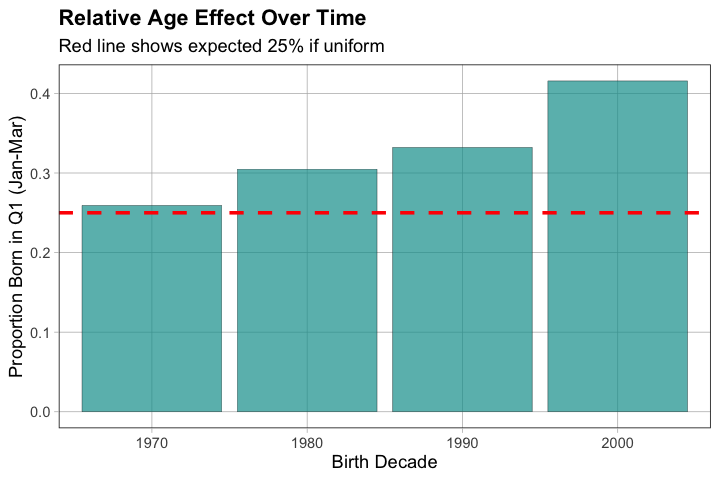

In [15]:
# Extract birth year and create decade groups
df <- df %>%
  mutate(
    birth_year = year(birth_date_parsed),
    birth_decade = (birth_year %/% 10) * 10
  )

# Calculate Q1 proportion by decade
decade_effect <- df %>%
  mutate(q1_born = birth_month %in% 1:3) %>%
  group_by(birth_decade) %>%
  summarize(
    total = n(),
    q1_count = sum(q1_born),
    q1_proportion = mean(q1_born),
    .groups = 'drop'
  ) %>%
  arrange(birth_decade)

decade_effect

# Visualize trend
gf_col(q1_proportion ~ factor(birth_decade), data = decade_effect) %>%
  gf_hline(yintercept = 0.25, linetype = "dashed", color = "red") %>%
  gf_labs(x = "Birth Decade", y = "Proportion Born in Q1 (Jan-Mar)",
          title = "Relative Age Effect Over Time",
          subtitle = "Red line shows expected 25% if uniform")


<div class="alert alert-block alert-warning">

**Sample Responses**
- The effect may be consistent across decades, suggesting it's a persistent structural issue
- Or it may show slight changes if awareness has led to policy adjustments
- The pattern typically remains above the 25% expected line, indicating the effect persists

</div>


<div class="alert alert-block alert-success">

### A3.0 — Optional Advanced: Other Sports Comparison — Approximate Time: 5-7 mins

</div>


## A3.0 — Other Sports Comparison

A3.1 — The relative age effect has been documented in many sports. Research shows it's particularly strong in sports where physical maturity matters. How might the effect differ between soccer (where skill and endurance matter) versus sports like ice hockey (where size and strength are more important)?

A3.2 — If you had access to NHL player data, what pattern would you expect to see? Would it be stronger or weaker than in soccer?

<div class="alert alert-block alert-warning">

**Sample Responses**
- The effect is found across many sports: soccer, hockey, baseball, tennis, etc.
- It tends to be stronger in sports where physical maturity provides clear advantages
- NHL might show a similar or even stronger pattern due to the importance of size and strength
- The effect is a systemic issue in youth sports organization, not specific to one sport
- Understanding this helps us see it's not about talent distribution, but about how we structure competition

</div>
